## 3.0 Causal analysis

In this notebook we try to compute the causal temporal graph of this variables for each climate group using Tigramite package

In [1]:
# Imports

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

c:\Users\Usuario\anaconda3\lib\site-packages\tigramite\plotting.py:26: UserWarning: [Errno 2] No such file or directory: 'c:\\Users\\Usuario\\anaconda3\\lib\\site-packages\\tigramite\\..\\versions.py'
  warnings.warn(str(e))
c:\Users\Usuario\anaconda3\lib\site-packages\tigramite\independence_tests\gpdc.py:27: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
c:\Users\Usuario\anaconda3\lib\site-packages\tigramite\independence_tests\gpdc_torch.py:33: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


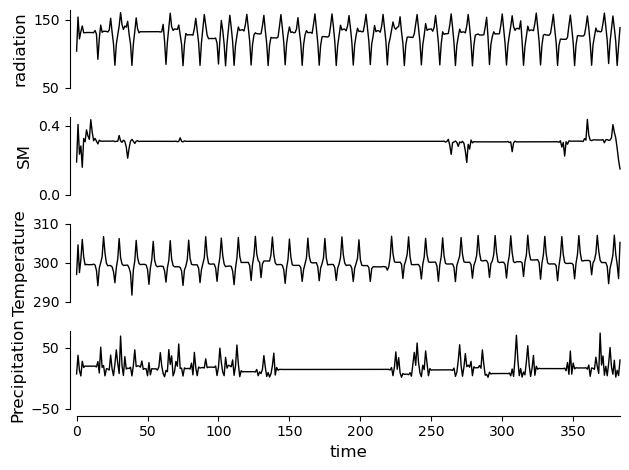

In [2]:
var_names = ['radiation', 'SM', 'Temperature', 'Precipitation']
dataframe = pp.DataFrame(np.loadtxt('./mean_series/4.txt'), var_names= var_names)
                         
tp.plot_timeseries(dataframe); plt.show()

### Non-lineal causality

In [3]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks')
pcmci_cmi_knn = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=cmi_knn,
    verbosity=2)
results = pcmci_cmi_knn.run_pcmci(tau_max=4, pc_alpha=0.05)
pcmci_cmi_knn.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 4
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Variable radiation

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (radiation -1) --> radiation (1/16):
    Subset 0: () gives pval = 0.00000 / val =  0.380
    No conditions of dimension 0 left.

    Link (radiation -2) --> radiation (2/16):
    Subset 0: () gives pval = 0.00000 / val =  0.276
    No conditions of dimension 0 left.

    Link (radiation -3) --> radiation (3/16):
    Subset 0: () gives pval = 0.00000 / val =  0.329
    No conditions of dimension 0 left.

    Link (radiation -4) --> radiation (4/16):
    Subset 0: () gives pval = 0.00000 / val =  0.169
    No conditions of dimension 0 left.

    Link (SM -1) --> radiation (5/16):
    Subset 0: () gives pval = 0.08000 / val =  0.036
    Non-significance detected.

    Link (

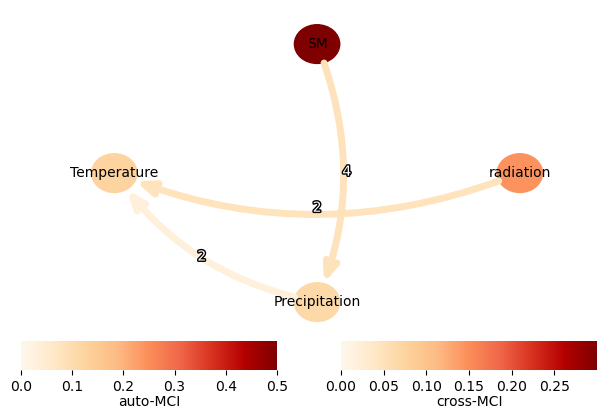

In [6]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    ); plt.show()

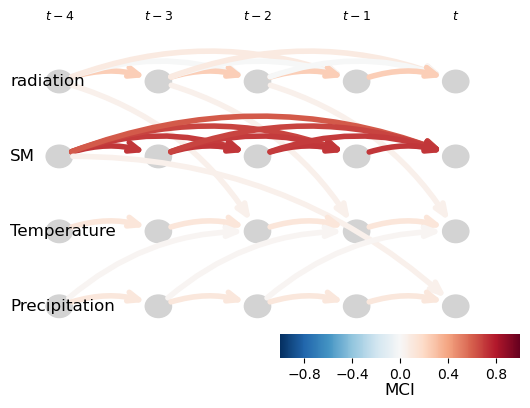

In [7]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()